# Project Overview

Hum Is Project Mein Kya Kar Rahe Hain?

- Is project mein hum Deep Learning ka use kar ke Image Classification System bana rahe hain.

## Specifically hum:

Cat aur Dog images ko classify karne wala CNN model bana rahe hain.

Hum computer ko train karte hain taake wo image dekh kar bataye:

- Ye Cat hai

- Ya Dog hai





# Step 01 : Install and Import Libraries

- pip install tensorflow

- Yeh command TensorFlow library install karti hai.

- TensorFlow ek powerful Deep Learning framework hai

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Libraries

## Is section mein hum project ke liye zaroori libraries import kar rahe hain.
## Numpy numerical operations aur arrays handle karne ke liye use hoti hai.
## Random library kisi bhi image ko randomly select karne ke liye use hoti hai.
## Matplotlib images aur graphs display karne ke liye use hoti hai.
## TensorFlow Keras ka Sequential model CNN banane ke liye use hota hai.
## Conv2D aur MaxPooling2D layers image se features extract karte hain.
## Flatten layer 2D data ko 1D mein convert karti hai.
## Dense layer final classification ke liye use hoti hai.
## ImageDataGenerator data augmentation ke liye use hota hai (jaise rotation, zoom, etc).


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 02: Data Load

## Is step mein hum CSV files se training aur testing data load kar rahe hain.
## X_train aur X_test image ke pixel values contain karte hain.
## Y_train aur Y_test un images ke labels (cat ya dog) contain karte hain.
## np.loadtxt() function CSV file ko numpy array mein convert karta hai.
## Shape print kar ke hum confirm karte hain ke kitni images hain aur har image ke kitne pixels hain.
## (2000, 30000) ka matlab hai 2000 images aur har image ke 30000 pixel values (100x100x3 RGB).
## Testing data mein 400 images hain jo model evaluate karne ke liye use hongi.


In [3]:
X_train = np.loadtxt('Image Classification CNN Keras Dataset/input.csv', delimiter = ',')
Y_train = np.loadtxt('Image Classification CNN Keras Dataset/labels.csv', delimiter = ',')

X_test = np.loadtxt('Image Classification CNN Keras Dataset/input_test.csv', delimiter = ',')
Y_test = np.loadtxt('Image Classification CNN Keras Dataset/labels_test.csv', delimiter = ',')

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


# Step 03 : Reshape & Normalize

# Is step mein hum image data ko CNN ke required format mein reshape kar rahe hain.
# Pehle har image ko (100, 100, 3) shape mein convert kiya ja raha hai,
# jahan 100x100 image size hai aur 3 RGB color channels hain.
# Labels ko bhi reshape kiya ja raha hai taake wo proper training format mein ho.
# Us ke baad pixel values ko 255 se divide kar ke normalize kiya ja raha hai
# taake values 0–1 range mein aa jayein.
# Normalization se model fast aur stable training karta hai aur accuracy improve hoti hai.


In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

# Step 04: Image Display

## Is step mein hum training data se ek random image select kar ke display kar rahe hain.
## random.randint() kisi bhi ek image ka index choose karta hai.
## plt.imshow() image ko screen par show karta hai.
## Is ka maqsad yeh confirm karna hai ke data sahi load aur reshape hua hai.
## Yeh step sirf visualization ke liye hai taake hum dekh saken ke image kaisi lag rahi hai.


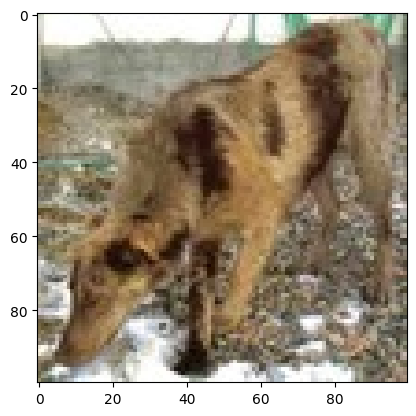

In [6]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Step 04: Model CNN Architecture 

## Is step mein hum Convolutional Neural Network (CNN) model bana rahe hain.
## Sequential model use ho raha hai jisme layers ek ke baad ek add hoti hain.
## Pehli Conv2D layer image se basic features (edges, patterns) detect karti hai.
## MaxPooling2D layer image ka size reduce karti hai aur important features retain karti hai.
## Doosri Conv2D aur MaxPooling layer deeper features learn karti hain.
## Flatten layer 2D feature maps ko 1D vector mein convert karti hai.
## Dense layer (64 neurons) high-level learning karti hai.
## Final Dense layer (1 neuron, sigmoid activation) binary classification ke liye hai
## jo output deta hai ke image cat hai ya dog.



In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# model.add()

## Yahan hum Sequential CNN model step by step build kar rahe hain.
## Pehli Conv2D layer (32 filters, 3x3 kernel) image se basic features detect karti hai.
## MaxPooling2D layer feature maps ka size reduce karti hai taake computation kam ho.
## Doosri Conv2D aur MaxPooling layer deeper aur complex features learn karti hain.
## Flatten layer 2D output ko 1D vector mein convert karti hai taake Dense layer use ho sake.
## Dense (64 neurons, relu) fully connected layer hai jo final learning karti hai.
## Last Dense (1 neuron, sigmoid) binary output deta hai (0 = cat, 1 = dog).


In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# model.compile()

### Is step mein hum model ko compile kar rahe hain.
### binary_crossentropy loss function use ho raha hai kyunki yeh binary classification (cat vs dog) hai.
### Adam optimizer weights ko efficiently update karta hai taake loss kam ho.
### Accuracy metric se hum check karte hain ke model kitni sahi predictions kar raha hai.


In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# model.fit()

### Is step mein hum model ko training data par train kar rahe hain.
### X_train images hain aur Y_train unke labels hain.
### epochs = 5 ka matlab model poora dataset 5 dafa dekhega aur seekhega.
### batch_size = 64 ka matlab har step par 64 images ek sath process hongi.
### Training ke dauran model loss calculate karta hai aur weights update karta hai
### taake accuracy improve ho aur predictions better ho jayein.


In [10]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 191ms/step - accuracy: 0.5200 - loss: 0.7192
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - accuracy: 0.5975 - loss: 0.6626
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - accuracy: 0.6600 - loss: 0.6252
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.6870 - loss: 0.5982
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.7405 - loss: 0.5384


# model.evaluate()

### Is step mein hum trained model ko testing data par evaluate kar rahe hain.
### X_test unseen images hain aur Y_test unke original labels hain.
### Yeh step check karta hai ke model ne training ke baad kitni sahi predictions ki.
### Output mein loss aur accuracy show hoti hai.
### Accuracy 0.68 ka matlab hai model 68% images sahi predict kar raha hai.
### Yeh step model ki real performance measure karne ke liye use hota hai.


In [11]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6650 - loss: 0.6055


[0.6054610013961792, 0.6650000214576721]

# Make Predictions

### Is step mein hum testing data se ek random image select kar ke prediction kar rahe hain.
### Pehle random index choose kar ke image display ki ja rahi hai.
### Phir model.predict() se us image ki probability nikali ja rahi hai.
### Sigmoid output 0 aur 1 ke darmiyan value deta hai.
### Agar value 0.5 se zyada ho to image ko 'dog' classify kiya ja raha hai,
### warna 'cat' classify kiya ja raha hai.
### Aakhir mein model ka final prediction print kiya ja raha hai.


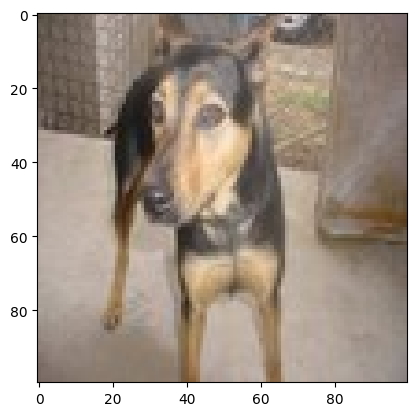

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
Our model says it is a : dog


In [12]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)